# **Decision Tree**

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Data Cleaning

In [2]:
# import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# handle null and unimportant values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].bfill() # fillna(int(df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

## Binary Classification

In [3]:
# train test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### simple tree

First, we try to implement a simple Decision Tree to extract information.

In [4]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       105
           1       0.75      0.78      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



<Axes: >

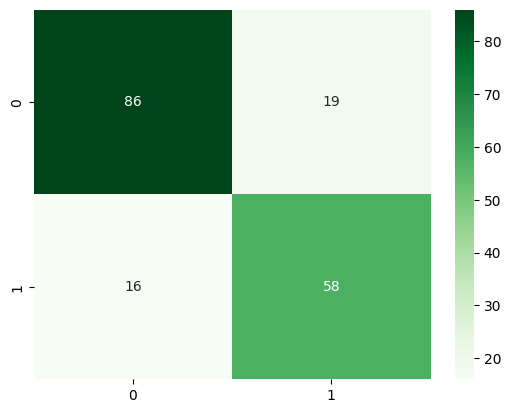

In [6]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

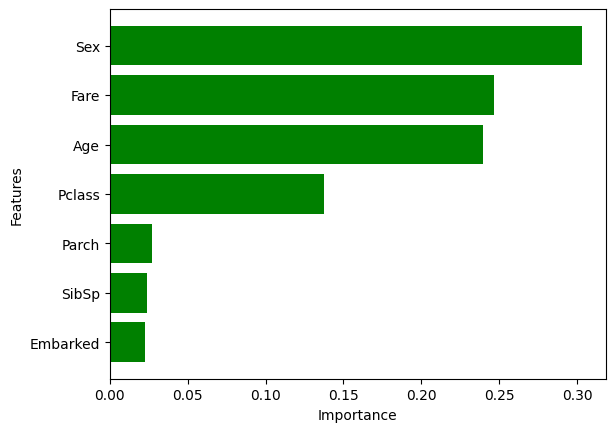

In [7]:
# getting important features in order (Data Mining)
idx = np.argsort(tree.feature_importances_)

plt.barh(np.arange(len(idx)), tree.feature_importances_[idx], color='Green')
plt.yticks(np.arange(len(idx)), [df.columns.drop('Survived')[i] for i in idx])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

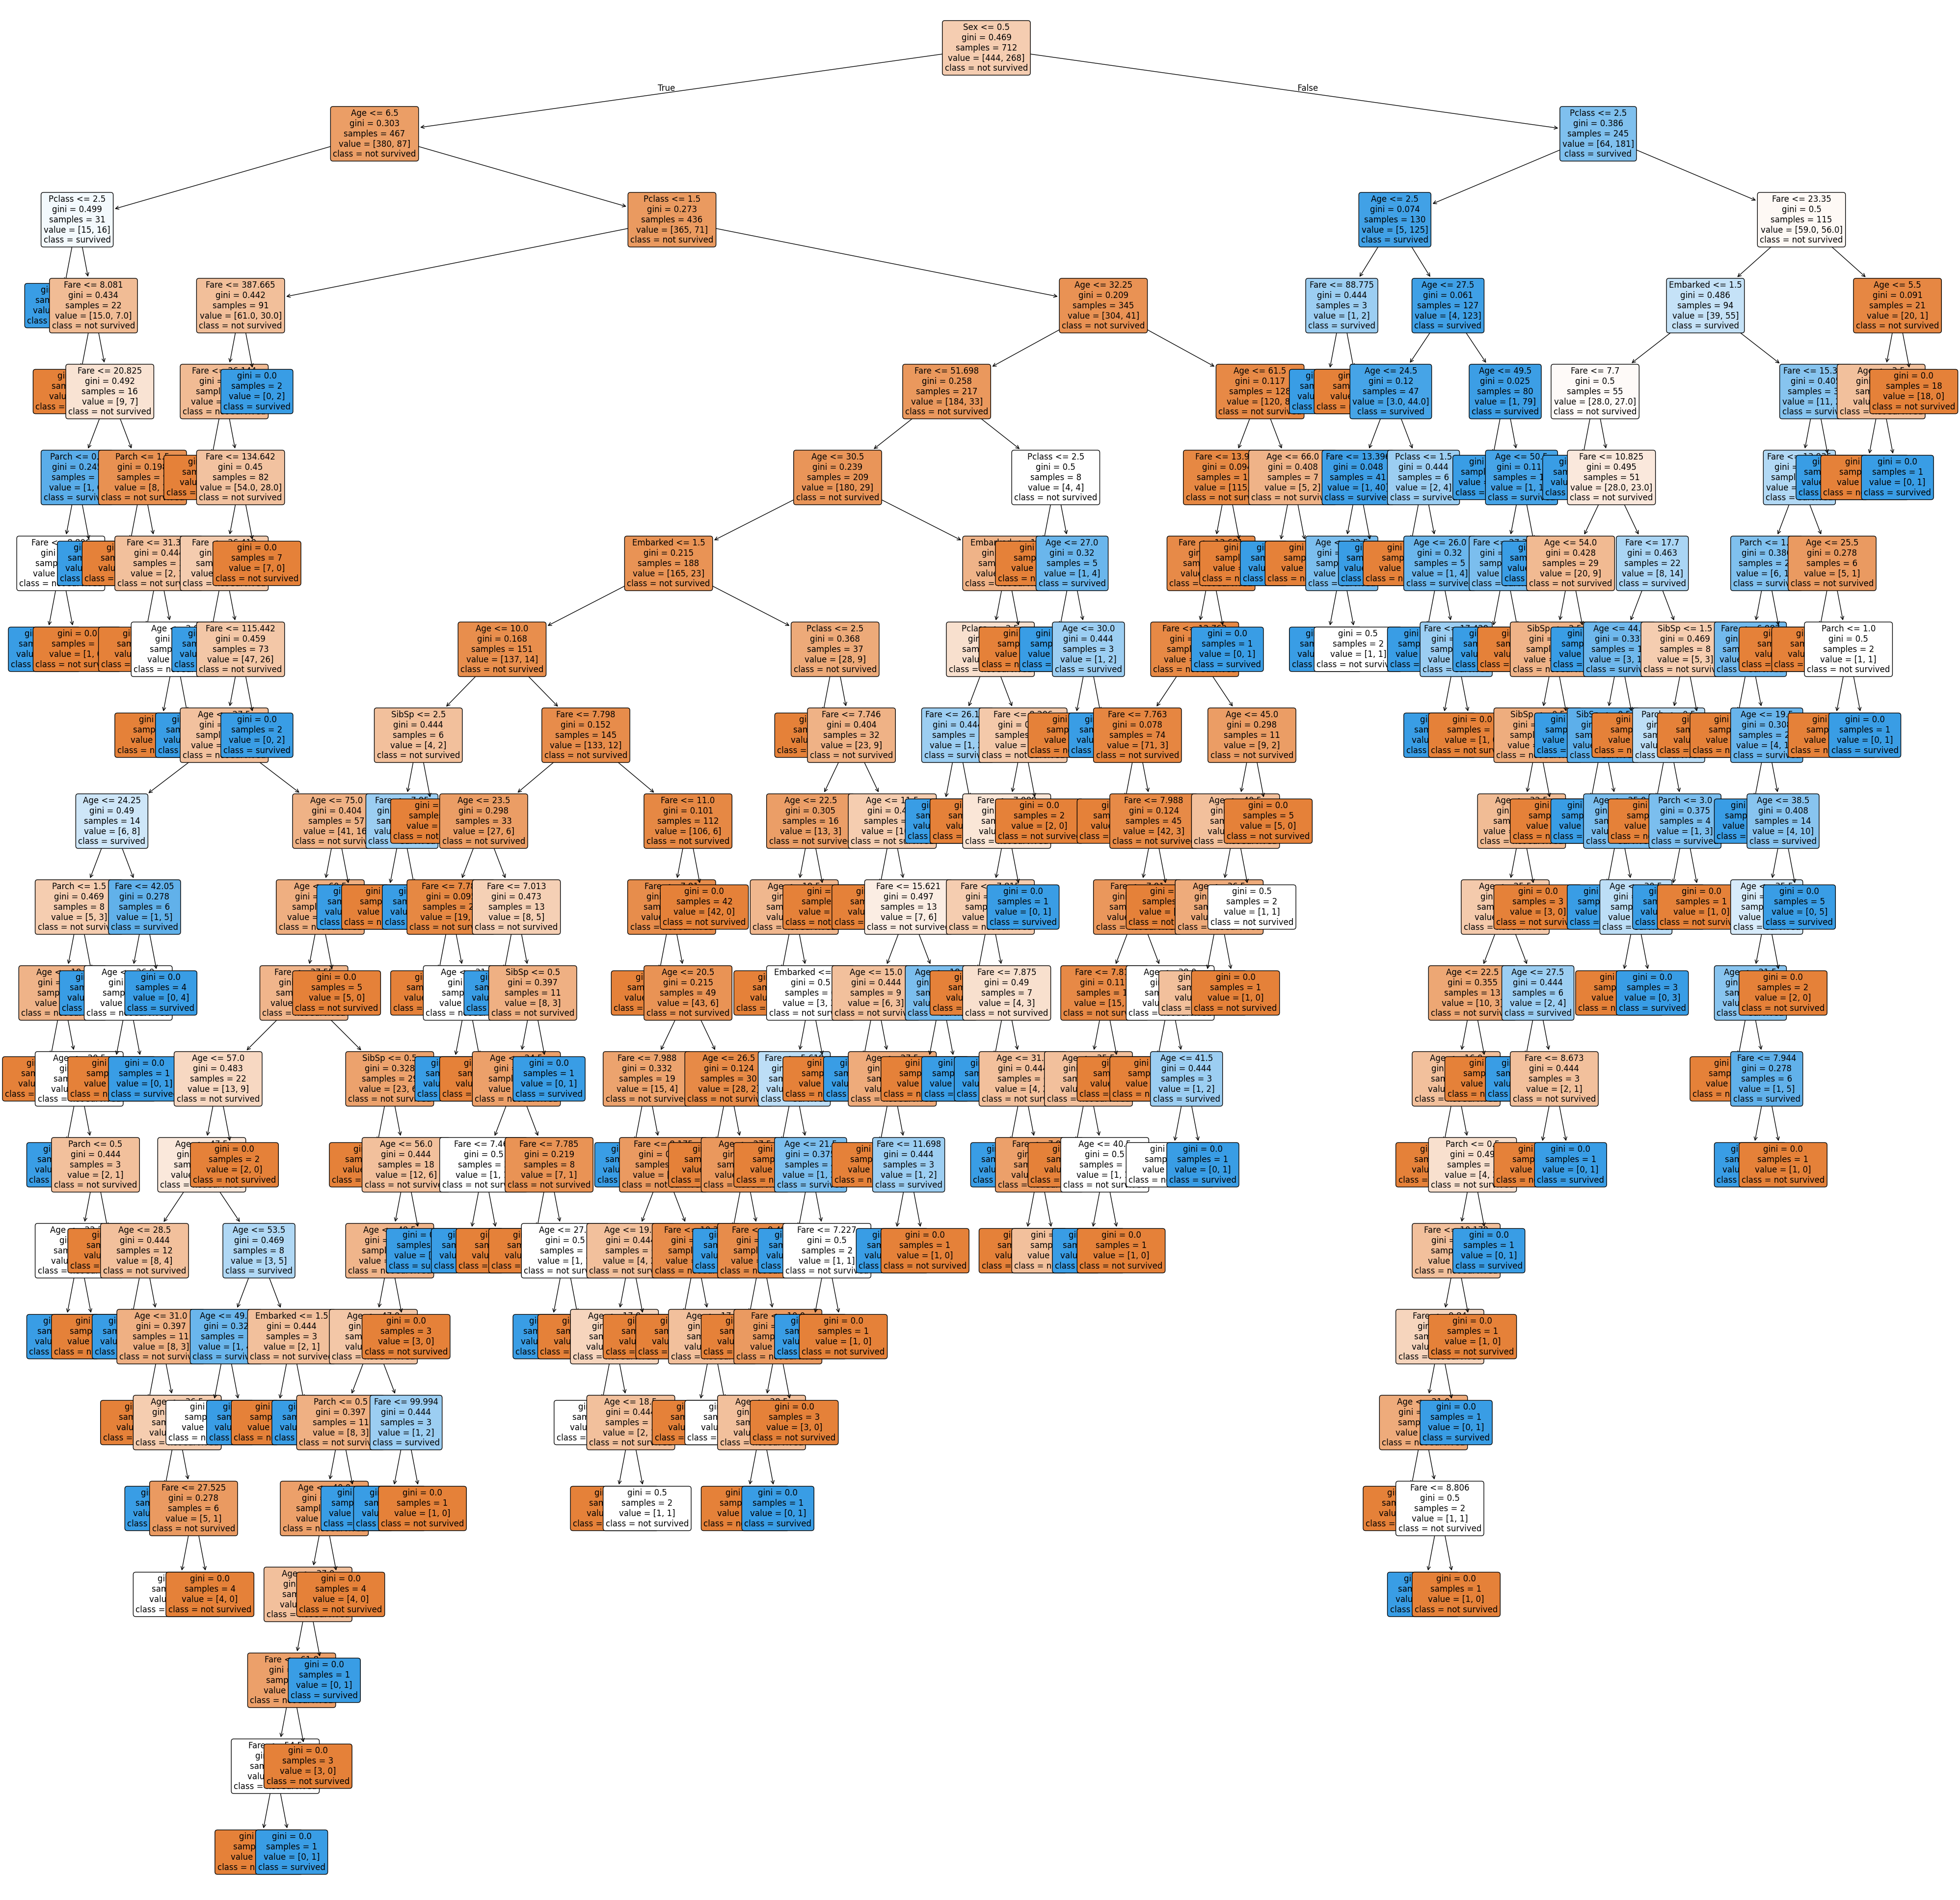

In [8]:
plt.figure(figsize=(50, 50))
plot_tree(tree,
          feature_names=df.drop('Survived', axis=1).columns,
          class_names=['not survived', 'survived'],
          filled=True,
          rounded=True,
          fontsize=12
          )
plt.show()

### modified tree

Our goal is to have less rules, better accuracy(or generally better results). So we start pruning manually based on the information given in each nodes. e.g. samples and value.

In [9]:
# rebuilding the tree with the manually pruning approach
clf = DecisionTreeClassifier(
    min_impurity_decrease=0.001,
    min_samples_leaf=7,
    min_samples_split=8,
    max_depth=6
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_leaf=7, min_samples_split=8)

In [10]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



Results are improved.

<Axes: >

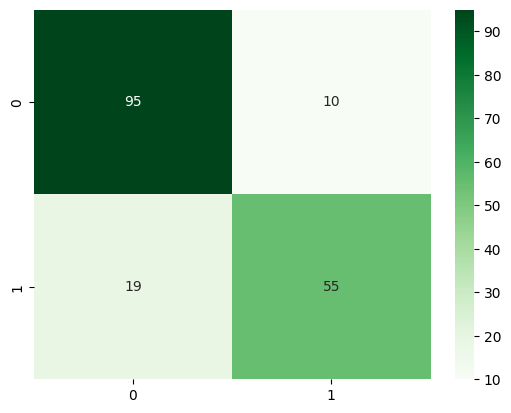

In [11]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

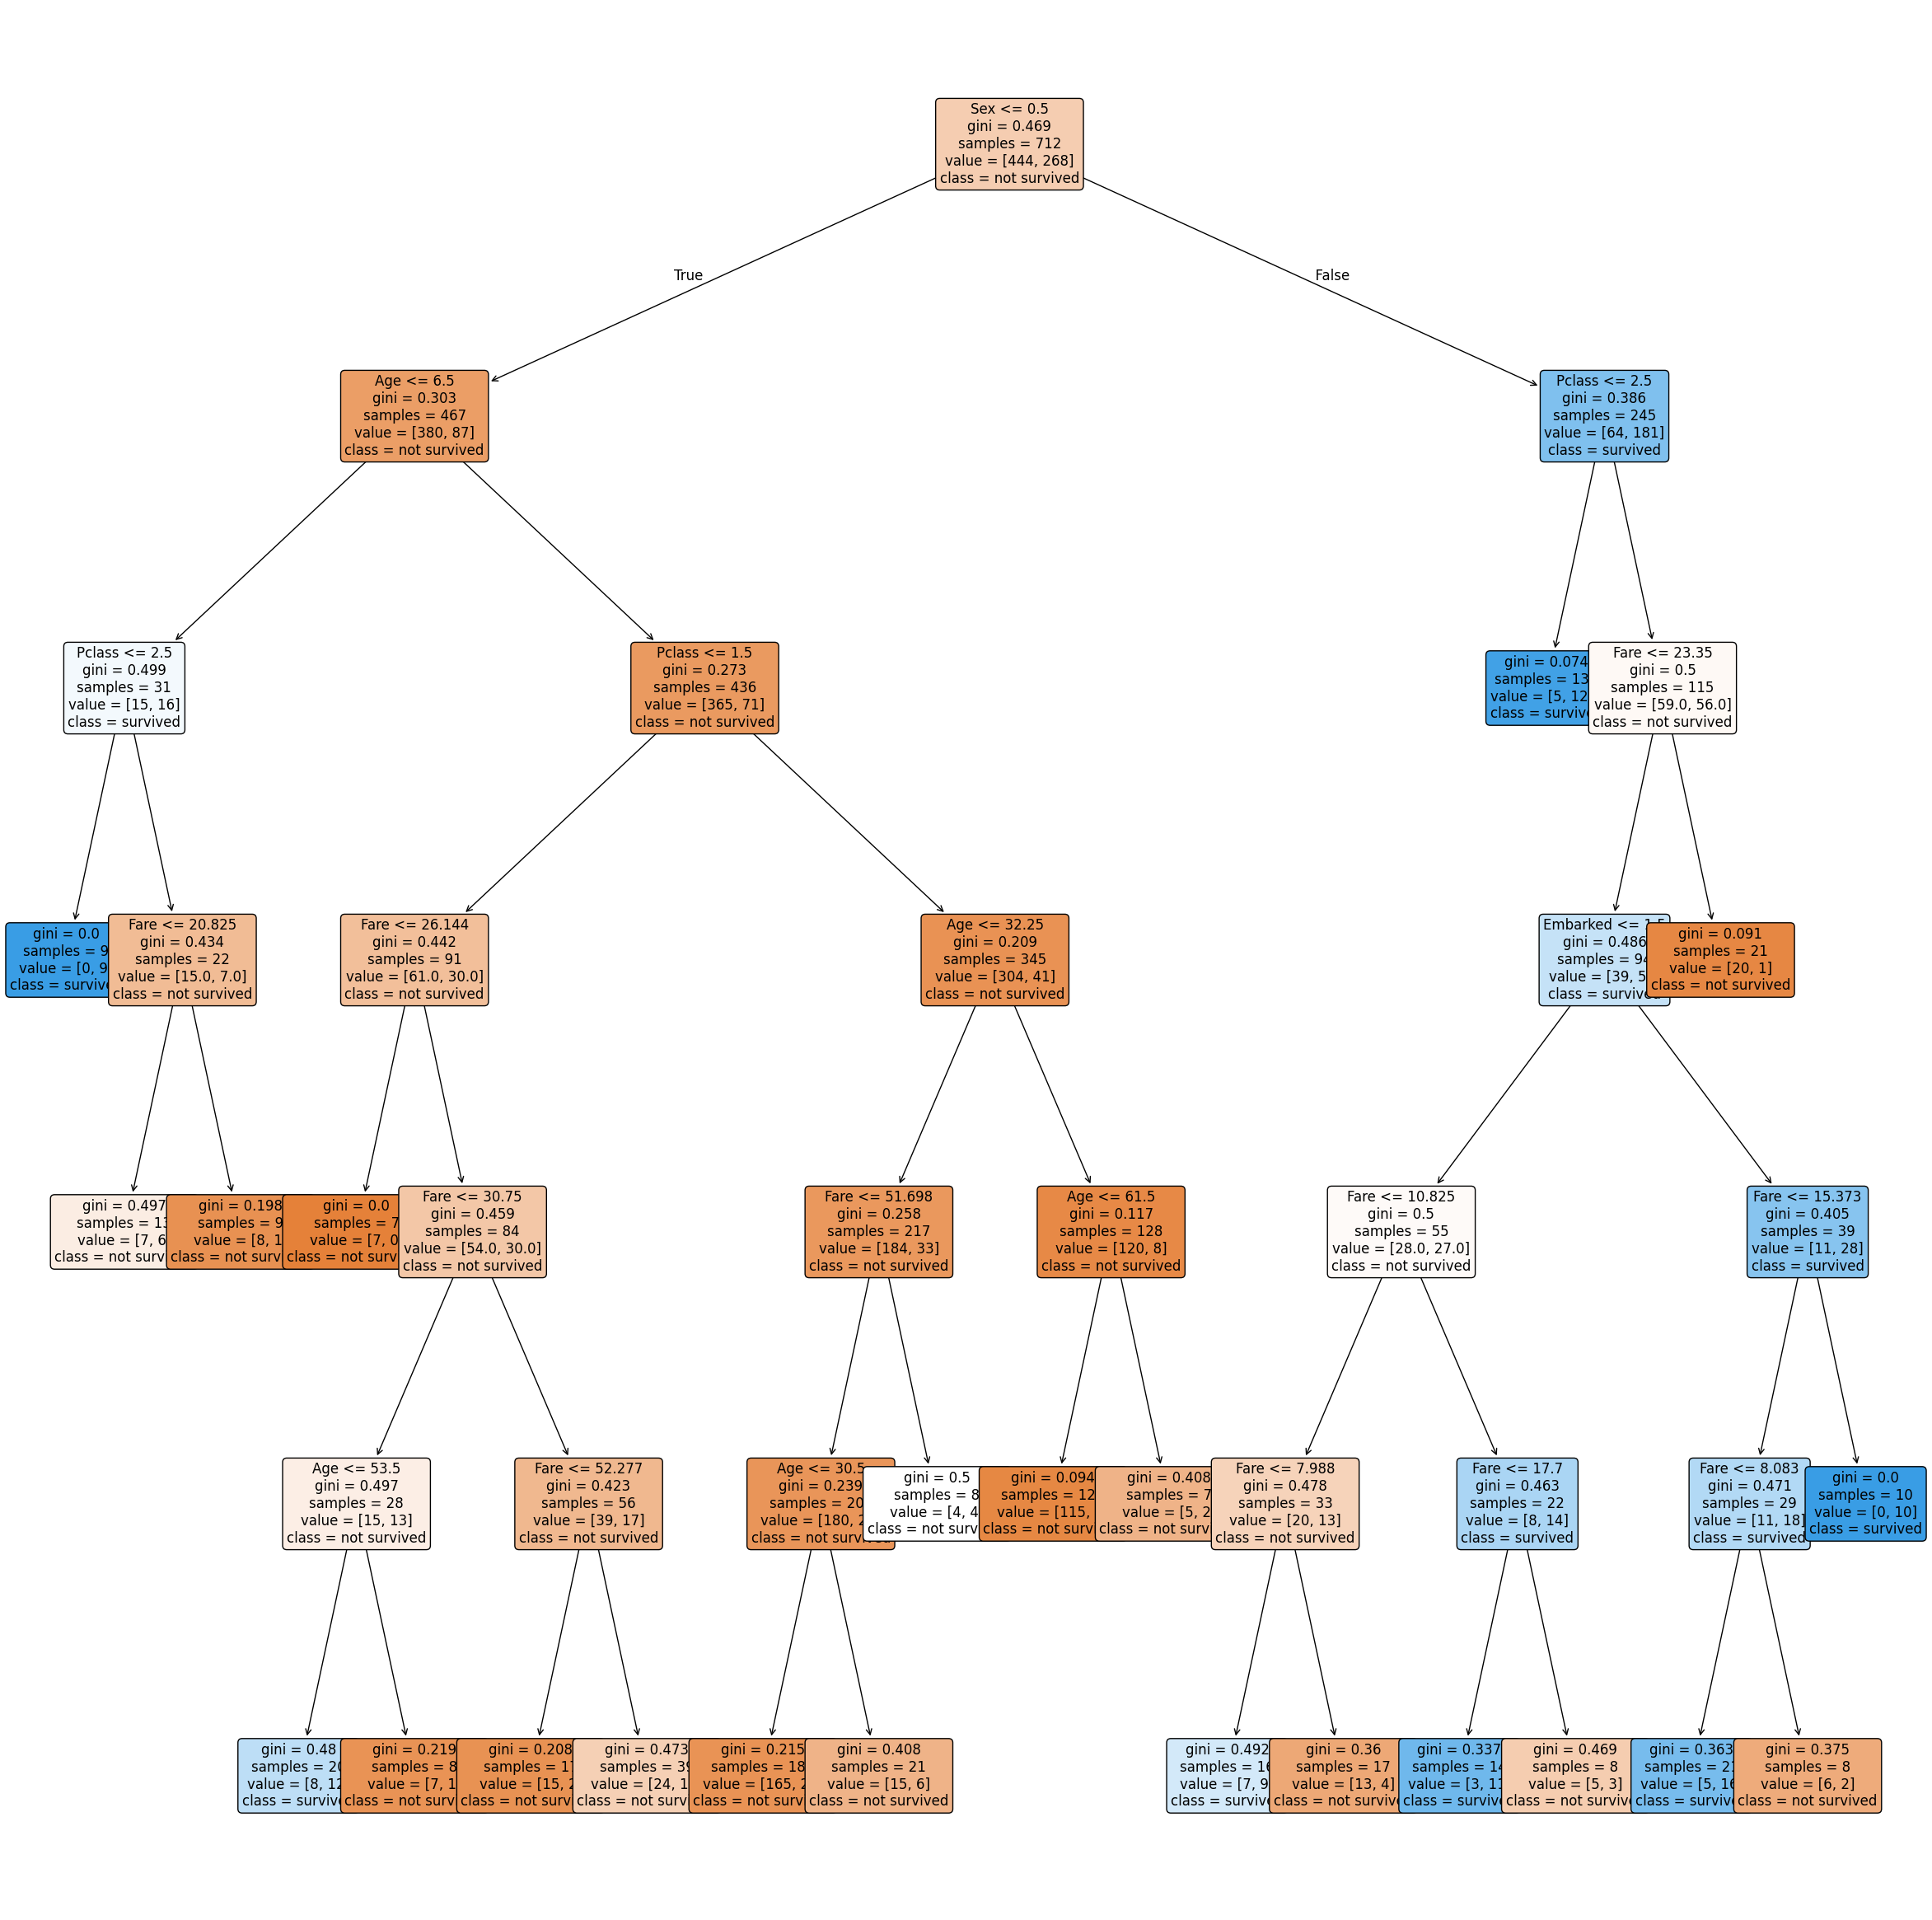

In [12]:
# modified tree (visualized)
plt.figure(figsize=(30, 30))
plot_tree(clf,
          feature_names=df.drop('Survived', axis=1).columns,
          class_names=['not survived', 'survived'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

### tree with only important features

Let's see if we can generate almost same results using only the important features.

In [13]:
important_features = ['Sex', 'Age', 'Fare', 'Pclass'] # based on data mining part

# rebuilding the tree with the manually pruning approach using only important features
model = DecisionTreeClassifier(
    min_impurity_decrease=0.001,
    min_samples_leaf=7,
    min_samples_split=8,
    max_depth=6
)
model.fit(X_train[important_features], y_train)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_leaf=7, min_samples_split=8)

In [14]:
y_pred = model.predict(X_test[important_features])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



The accuracy decreased only 0.02 comparing to the modified version of the tree.

<Axes: >

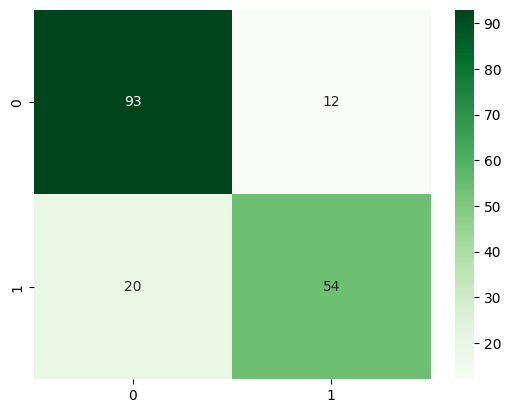

In [15]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

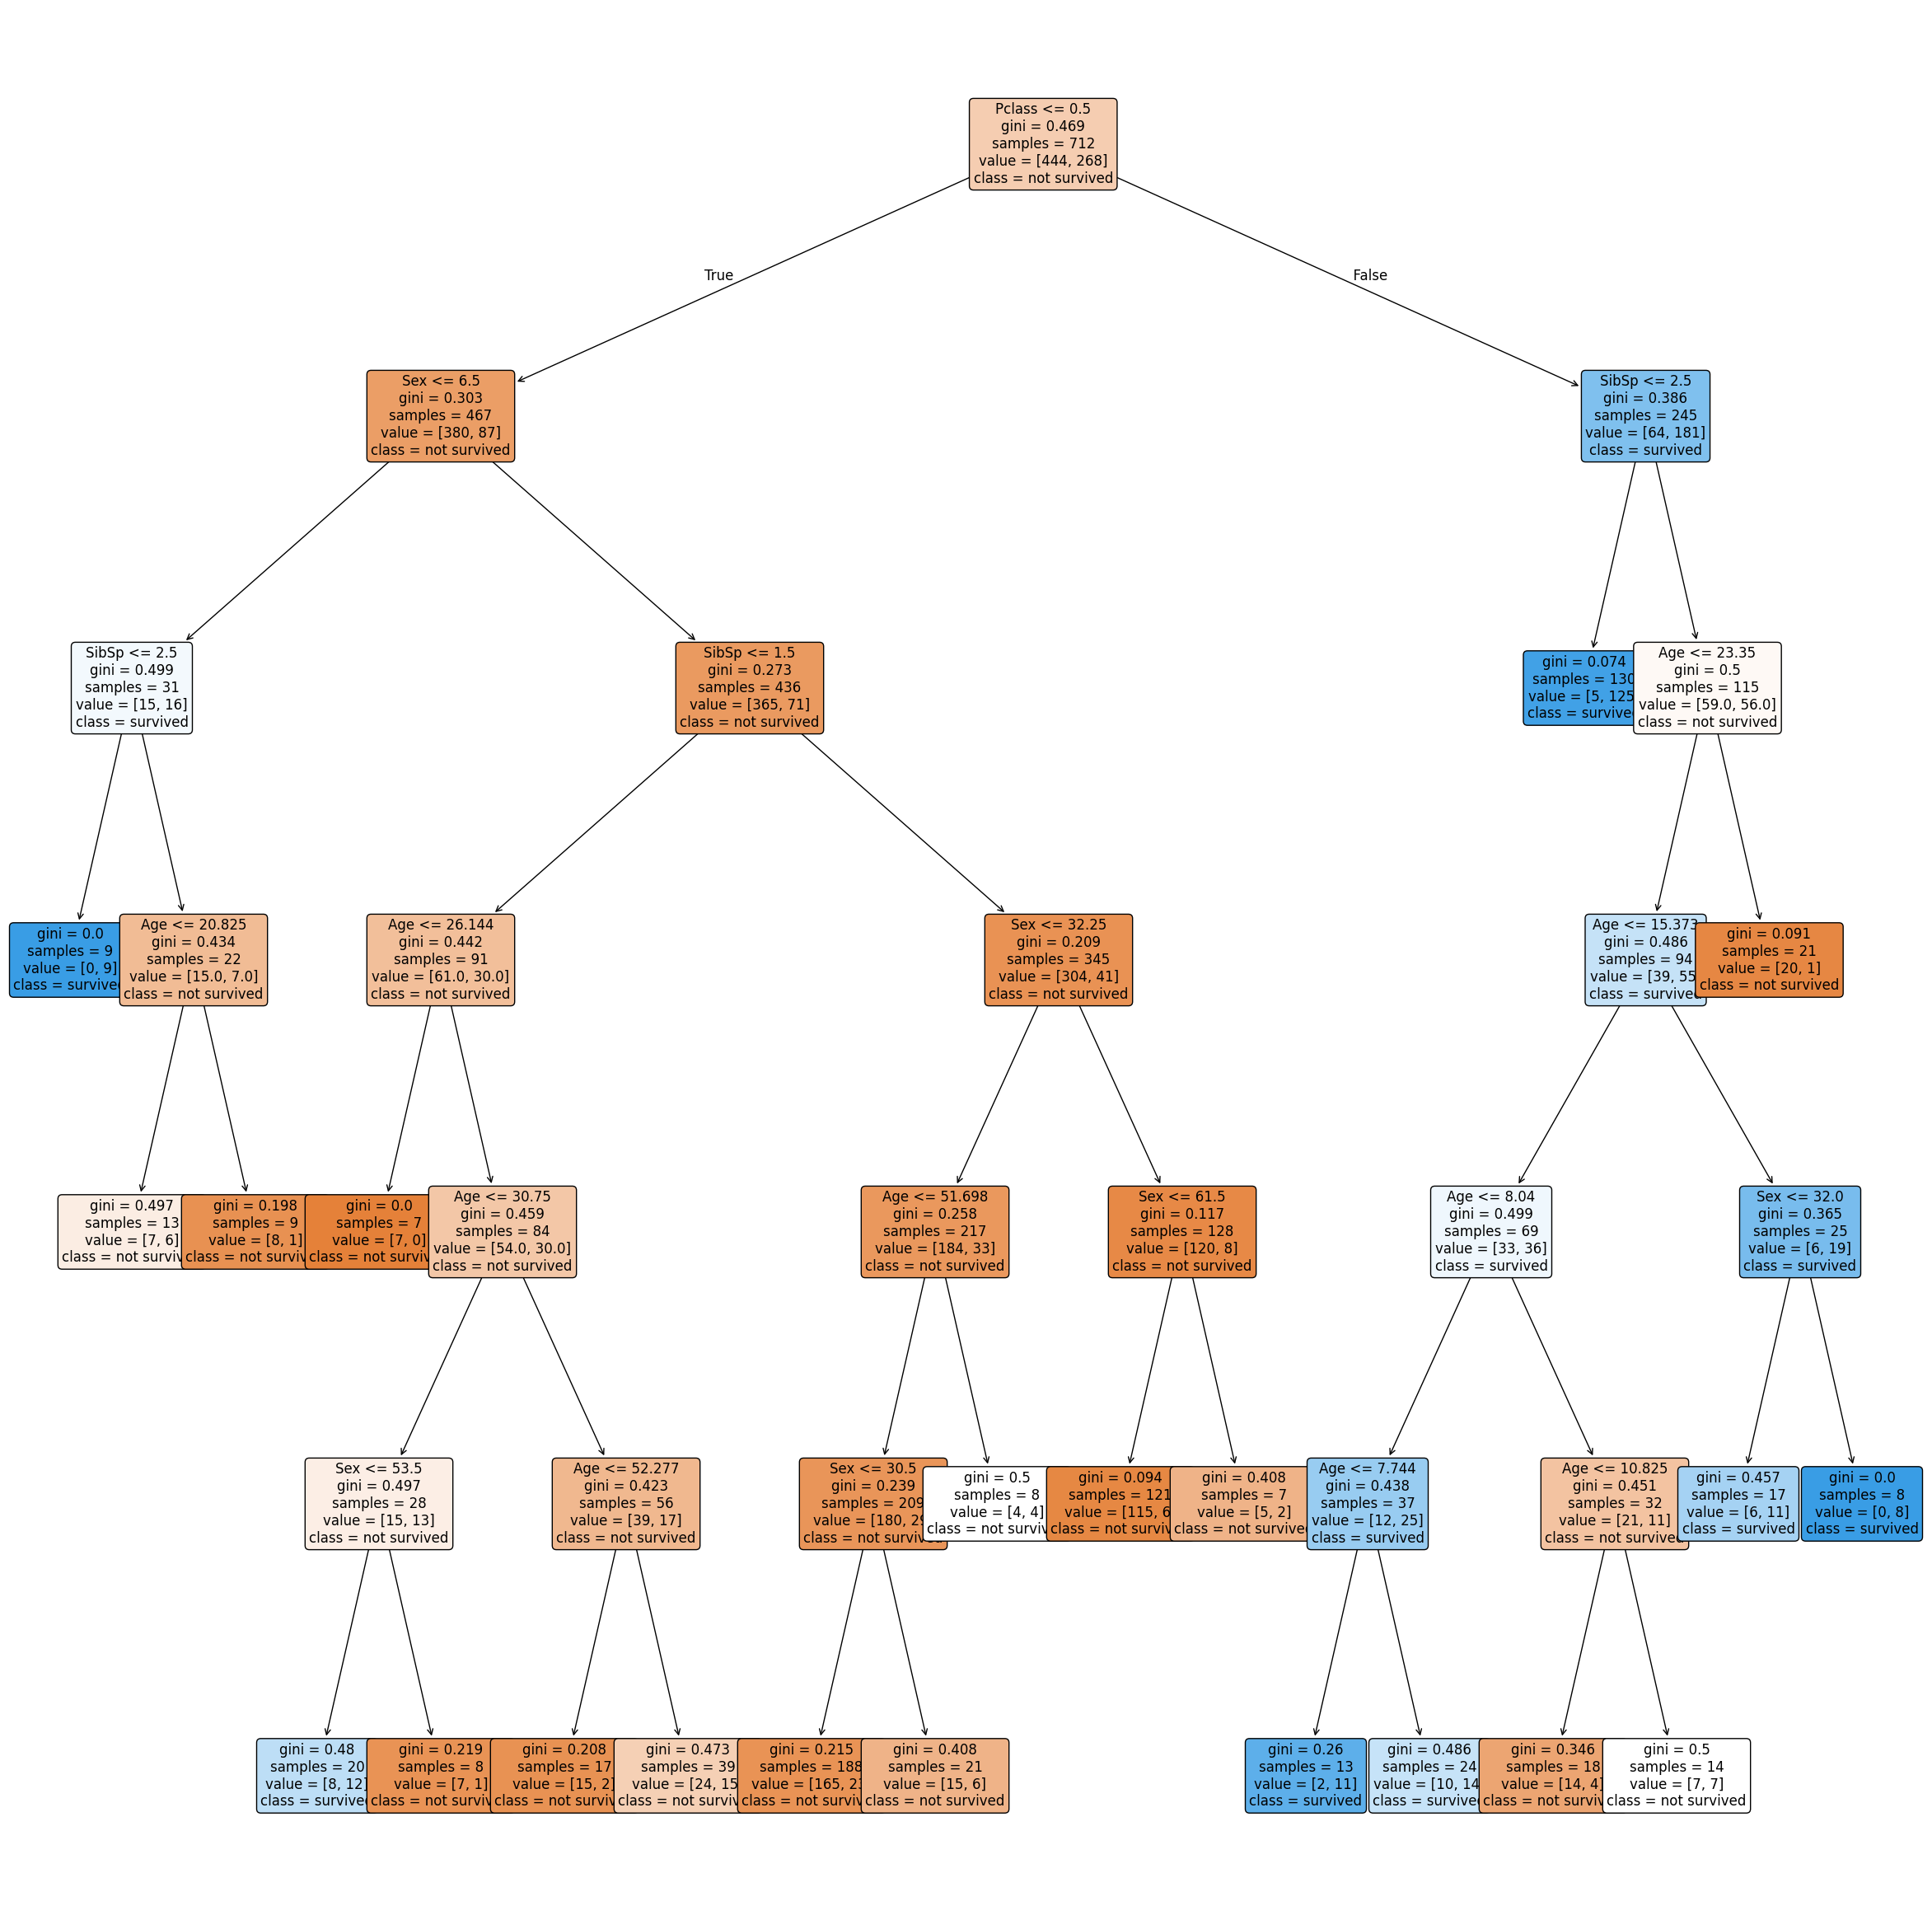

In [16]:
# final tree (visualized)
plt.figure(figsize=(30, 30))
plot_tree(model,
          feature_names=df.drop('Survived', axis=1).columns,
          class_names=['not survived', 'survived'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()